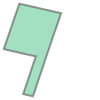

In [27]:
import arcpy 
import json 

input_json = r"C:\Users\Asiha\Documents\Scripts\finals2\no_tax.json"
with open(input_json,'r') as file:
        no_tax = json.load(file)
        
arcpy.FromWKT(no_tax['data'][1][8])




In [57]:
workspace = r"C:\Users\Asiha\Documents\Scripts\finals2"
fcname = 'no_tax.shp'
wkid = 4236

fc_fullname = os.path.join(workspace,fcname)
if arcpy.Exists(fc_fullname):
        arcpy.management.Delete(fc_fullname)

arcpy.management.CreateFeatureclass(out_path=workspace,out_name=fcname,
                                        geometry_type='POLYGON',
                                        spatial_reference=wkid)

<Result 'C:\\Users\\Asiha\\Documents\\Scripts\\finals2\\no_tax.shp'>

In [60]:
geom1 = arcpy.FromWKT(no_tax['data'][0][8])

new_row = []
for row in no_tax['data']:
        polygon = arcpy.FromWKT(row[8])
        new_row.append(polygon)

In [61]:
fields = no_tax['meta']['view']['columns']
    #for field in fields:
    #print(field['name'])
field_type = ['TEXT','TEXT','LONG','LONG','TEXT','LONG','TEXT','TEXT','TEXT','TEXT','TEXT','TEXT','TEXT']
field_names = []
for ind,field in enumerate(fields):
        name = field['name']
        if name == 'the_geom':
            continue
        if name.lower() == 'id':
            name = f'id_{ind}'
        max_len = min(10,len(name))
        name = name[:max_len]
        field_names.append(name)
field_names = [field.replace(" ","_") for field in field_names]
field_names = [field.replace(".","_") for field in field_names]
    #field_names

for ind,field_name in enumerate(field_names):
        arcpy.management.AddField(fc_fullname,field_name=field_name,field_type=field_type[ind])
        
field_names.append('SHAPE@')

    #field_names

with arcpy.da.InsertCursor(fc_fullname,field_names=field_names) as cursor:
        for index, row in enumerate(tax_json['data']):
            new_polygon = []
            for ind, value in enumerate(row):
                if ind == 8:
                    continue
                if value == None:
                    value = ""
                new_polygon.append(value)
            new_polygon.append(new_row[index])
            cursor.insertRow(new_polygon)